In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
def rgb2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][0] + 0.5870*image[i][j][1] + 0.1140*image[i][j][2])
            
    return grayImg

In [3]:
yagami = plt.imread("IoriYagami.jpg")
yagamiGray = rgb2gray(yagami)

# 1. Melakukan Dekomposisi Citra dan Menampilkan Hasil Dekomposisi Citra Pada Level 3,4,5, dan seterusnya secara dinamasi

### Membuat class dan method untuk melakukan dekomposisi

In [4]:
class Dkmp:
	def __init__ (self, image, loK, hiK):
		self.image = image
		self.loK = loK
		self.hiK = hiK

	def filter(self, image, kernel):
		HtoInt = int((kernel.shape[0] - 1)/2)  
		WtoInt = int((kernel.shape[1] - 1)/2) 
		PaddingKanan = kernel.shape[1]-WtoInt
		PaddingBawah = kernel.shape[0]-HtoInt
		result = np.zeros(image.shape)
		imgs = np.pad(image, ((WtoInt, PaddingKanan), (HtoInt, PaddingBawah)),mode='edge')
		for i in range(result.shape[0]):
			for j in range(result.shape[1]):
				pixel = 0
				for k in range(kernel.shape[0]):
					for l in range(kernel.shape[1]):
						pixel += imgs[i+k, j+l] * kernel[k, l]
				result[i, j] = pixel
		return result

	def Proses(self):
		H = self.filter(self.image, self.hiK )
		L = self.filter(self.image, self.loK )
		HDS = H[::2, ::]
		LDS = L[::2, ::]
		HH = self.filter(HDS, np.transpose(self.hiK))
		HL = self.filter(HDS, np.transpose(self.loK))
		LH = self.filter(LDS, np.transpose(self.hiK))
		LL = self.filter(LDS, np.transpose(self.loK))
		self.HHDS = HH[::, ::2]
		self.HLDS = HL[::, ::2]
		self.LHDS = LH[::, ::2]
		self.LLDS = LL[::, ::2]
		self.HHDS = self.normalisasi(self.HHDS)
		self.HLDS = self.normalisasi(self.HLDS)
		self.LHDS = self.normalisasi(self.LHDS)
		self.LLDS = self.normalisasi(self.LLDS)
		list = [self.LLDS, self.HLDS, self.LHDS, self.HHDS]
		return list

	def normalisasi(self, image):
		image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
		return image

	def show(self):
		plt.figure(figsize=(10,10))
		plt.yticks = []
		plt.xticks = []
		plt.subplot(2,2,1)
		plt.title('LL')
		plt.imshow(self.LLDS, cmap="gray")

		plt.subplot(2,2,3)
		plt.title('LH')
		plt.imshow(self.LHDS, cmap="gray")

		plt.subplot(2,2,2)
		plt.title('HL')
		plt.imshow(self.HLDS, cmap="gray")

		plt.subplot(2,2,4)
		plt.title('HH')
		plt.imshow(self.HHDS, cmap="gray")


Fungsi Proses melakukan proses dekomposisi citra menggunakan Dual-tree Complex Wavelet Transform (DTCWT) dengan melakukan konvolusi terhadap citra menggunakan kernel rendah (loK) dan kernel tinggi (hiK), kemudian melakukan subsampling dan normalisasi pada hasilnya. Selanjutnya, hasil transformasi disimpan dalam atribut objek.

Konstruktor (__init__): Metode ini digunakan untuk menginisialisasi objek kelas Dkmp. Pada saat pembuatan objek, metode ini menerima tiga parameter: image, loK, dan hiK. image adalah citra yang akan didekomposisi, sedangkan loK dan hiK adalah kernel filter rendah dan tinggi untuk proses dekomposisi.

Metode filter: Metode ini melakukan proses konvolusi terhadap citra dengan menggunakan kernel tertentu. Kernel digunakan untuk mengaplikasikan filter pada citra dengan metode konvolusi. Pada proses konvolusi, nilai piksel di setiap posisi dalam citra akan diubah sesuai dengan nilai kernel yang bersesuaian.

Metode Proses: Metode ini merupakan inti dari proses dekomposisi DTCWT. Pertama, citra difilter menggunakan kernel rendah (loK) dan kernel tinggi (hiK). Kemudian, citra hasil filter tersebut disubsampling, artinya resolusi citra dikurangi dengan mengambil setiap baris dan kolom dengan increment 2. Setelah itu, dilakukan proses filter kembali pada citra yang telah disubsampling, kali ini dengan menggunakan transpose dari kernel rendah dan tinggi. Hasil dari proses ini adalah empat jenis citra: LL (Low-Low), LH (Low-High), HL (High-Low), dan HH (High-High). Citra-citra ini kemudian dinormalisasi dan disimpan dalam atribut objek

Metode normalisasi, Metode ini digunakan untuk melakukan normalisasi pada citra. Normalisasi dilakukan dengan memastikan bahwa intensitas piksel dalam citra berada dalam rentang 0 hingga 255.

fungsi show  ini bertanggung jawab untuk menampilkan hasil transformasi DTCWT dalam empat subplot berbeda. Subplot-subplot ini menunjukkan empat jenis citra hasil dekomposisi: LL, LH, HL, dan HH. Setiap subplot diberi judul yang sesuai dan tampilan sumbu x dan y dimatikan agar hasilnya lebih bersih dan fokus pada gambar yang ditampilkan.

In [5]:
def merge(img,img2, img3, img4):
    hasilHori1=np.zeros([img.shape[0],img.shape[1]+img2.shape[1]])
    for i in range(hasilHori1.shape[0]):
        for j in range(hasilHori1.shape[1]):
            if(j<img.shape[1]):
                hasilHori1[i][j]=img[i][j]
            else:
                hasilHori1[i][j]=img2[i][j-img.shape[1]]

    hasilHori2=np.zeros([img3.shape[0],img3.shape[1]+img4.shape[1]])
    for i in range(hasilHori2.shape[0]):
        for j in range(hasilHori2.shape[1]):
            if(j<img3.shape[1]):
                hasilHori2[i][j]=img3[i][j]
            else:
                hasilHori2[i][j]=img4[i][j-img3.shape[1]]

    hasil=np.zeros([hasilHori1.shape[0]+hasilHori2.shape[0],hasilHori1.shape[1]])
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            if(i<hasilHori1.shape[0]):
                hasil[i][j]=hasilHori1[i][j]
            else:
                hasil[i][j]=hasilHori2[i-hasilHori1.shape[0]][j]
                        
    return hasil


Fungsi merge ertujuan untuk menggabungkan empat citra menjadi satu citra dengan tata letak horisontal.

Parameter Fungsi: Fungsi merge menerima empat parameter: img, img2, img3, dan img4, masing-masing merupakan citra yang akan digabungkan.

Penggabungan Horizontal: Fungsi ini pertama-tama membuat citra hasil yang akan memiliki lebar yang sama dengan jumlah lebar dari keempat citra yang digabungkan (img, img2, img3, dan img4), tetapi tingginya adalah jumlah tinggi dari dua citra horizontal pertama, img dan img2. Ini dilakukan untuk menggabungkan dua citra pertama secara horizontal.

Looping: Fungsi ini menggunakan loop nested (loop dalam loop) untuk mengisi piksel pada citra hasil. Dalam loop terluar, loop dilakukan pada setiap baris citra hasil (hasilHori1 dan hasilHori2), sedangkan dalam loop dalam, loop dilakukan pada setiap kolom.

Pengisian Piksel: Setiap piksel dalam citra hasil diisi dengan nilai piksel yang sesuai dari citra input. Untuk citra img dan img2, piksel dari citra img akan diambil untuk kolom pertama hingga lebar citra img, sedangkan piksel dari citra img2 akan diambil untuk kolom berikutnya hingga akhir citra hasil. Hal yang sama dilakukan untuk citra img3 dan img4.

Penggabungan Akhir: Setelah proses pengisian selesai, citra hasilHori1 dan hasilHori2 digabungkan secara vertikal menjadi satu citra dengan lebar yang sama, tetapi tinggi yang berbeda. Hal ini dilakukan dengan membuat citra hasil akhir yang tingginya sama dengan jumlah kedua tinggi citra hasil horizontal. Kemudian, loop dilakukan lagi untuk mengisi citra hasil akhir dengan piksel dari kedua citra hasil horizontal.

Pengembalian Hasil: Citra hasil akhir dikembalikan sebagai output dari fungsi merge.

### Menampikan Hasil Dekomposisi CItra 1

membuat objek dkmp1 dari kelas Dkmp, kemudian menggunakan citra yagamiGray sebagai citra input dan kernel rendah (lowKernel) serta kernel tinggi (highKernel) untuk proses dekomposisi.

Pertama, kernel rendah (lowKernel) dan kernel tinggi (highKernel) yang telah Anda tentukan digunakan untuk membuat objek dkmp1 dari kelas Dkmp. Kemudian, metode Proses() dipanggil untuk melakukan proses dekomposisi citra menggunakan Dual-tree Complex Wavelet Transform (DTCWT) dengan menggunakan kernel yang telah ditentukan. Setelah itu, metode show() dipanggil untuk menampilkan hasil transformasi dalam empat subplot berbeda, masing-masing menunjukkan jenis citra hasil dekomposisi: LL (Low-Low), LH (Low-High), HL (High-Low), dan HH (High-High).

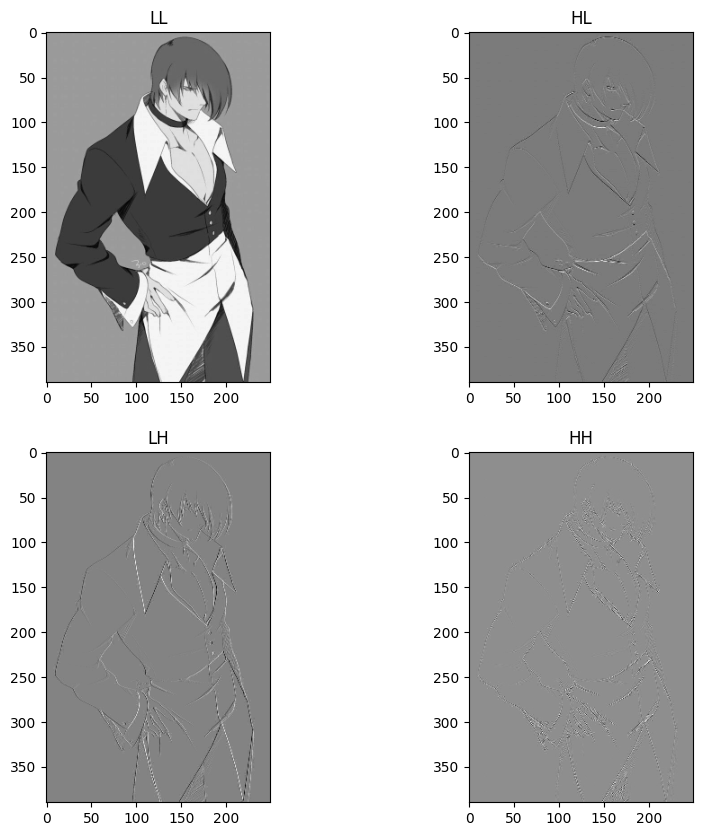

In [6]:
lowKernel = np.array([[0.7],[0.7]])
highKernel = np.array([[-0.7],[0.7]])
dkmp1 = Dkmp(yagamiGray,lowKernel,highKernel)
dkmp1.Proses()
dkmp1.show()   

### menggabungkan hasil transformasi DTCWT dari objek dkmp1 menjadi satu citra dengan menggunakan fungsi merge, dan kemudian menampilkan semua jenis citra hasil transformasi dalam subplot tunggal.

hasilDkmp1 = merge(dkmp1.LLDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.HHDS): Menggunakan fungsi merge untuk menggabungkan citra-citra hasil transformasi DTCWT dari objek dkmp1 menjadi satu citra. Citra-citra yang digabungkan adalah LLDS (Low-Low), HLDS (High-Low), LHDS (Low-High), dan HHDS (High-High).

plt.figure(figsize=(20,20)): Membuat sebuah gambar baru dengan ukuran 20x20 inci untuk menampilkan semua subplot.

plt.subplot(1,5,1): Membuat subplot pertama dari lima subplot dalam satu baris. Ini akan menampilkan citra hasil dari transformasi LL (Approximation).

plt.title('Approximation'): Menambahkan judul untuk subplot yang menampilkan citra hasil dari transformasi LL.

plt.imshow(dkmp1.LLDS, cmap="gray"): Menampilkan citra hasil transformasi LL (Approximation) dari objek dkmp1 pada subplot pertama.

Langkah 3-5 diulangi untuk menampilkan citra-citra hasil dari transformasi HL (Horizontal Detail), LH (Vertical Detail), HH (Diagonal Detail), dan hasil gabungan keseluruhan pada subplot-subplot berikutnya.


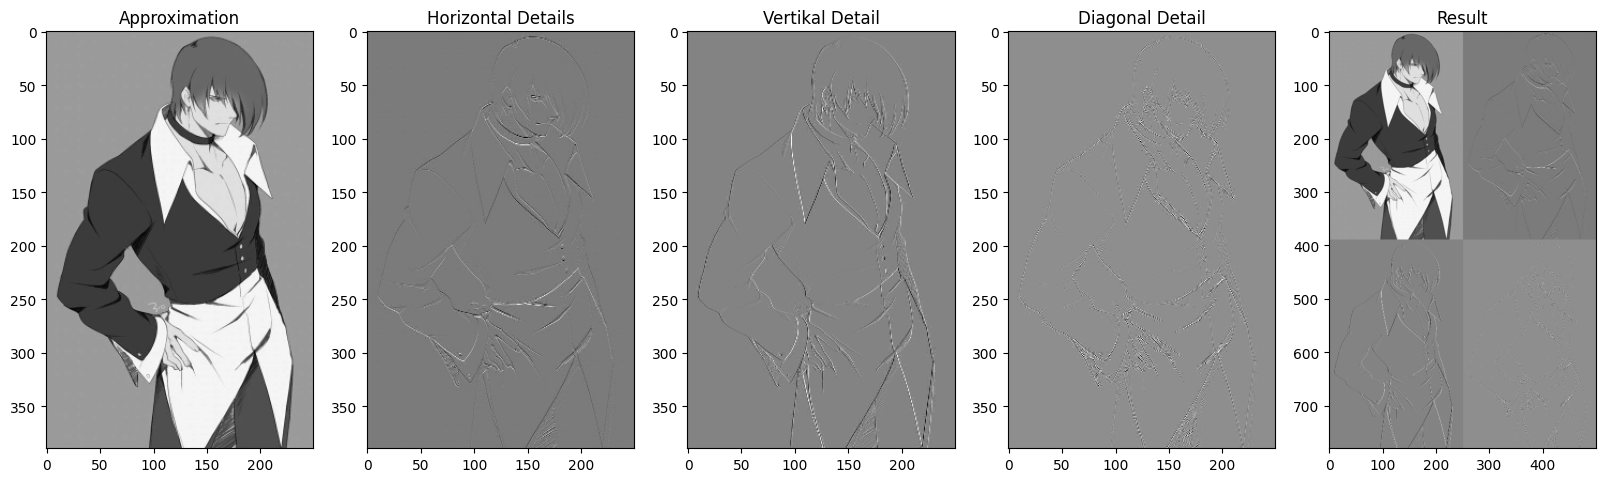

In [7]:
hasilDkmp1 = merge(dkmp1.LLDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.HHDS)

plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.title('Approximation')
plt.imshow(dkmp1.LLDS, cmap="gray")
plt.subplot(1,5,2)
plt.title('Horizontal Details')
plt.imshow(dkmp1.HLDS, cmap="gray")
plt.subplot(1,5,3)
plt.title('Vertikal Detail')
plt.imshow(dkmp1.LHDS, cmap="gray")
plt.subplot(1,5,4)
plt.title('Diagonal Detail')
plt.imshow(dkmp1.HHDS, cmap="gray")
plt.subplot(1,5,5)
plt.title('Result')
plt.imshow(hasilDkmp1, cmap="gray")

In [8]:
def DkmpDinamis(level, loK, hiK, image):
    listDkmp = []
    for i in range(level):
        if i == 0:
            dkmp = Dkmp(image, loK, hiK)
            dkmp.Proses()
            listDkmp.append(dkmp)
        else:
            dkmp = Dkmp(listDkmp[i-1].LLDS, loK, hiK)
            dkmp.Proses()
            listDkmp.append(dkmp)
    
    hasilDkmp = merge(listDkmp[-1].LLDS, listDkmp[-1].HLDS, listDkmp[-1].LHDS, listDkmp[-1].HHDS)
    for element in listDkmp[-2::-1]:
        tempDkmp = hasilDkmp
        tinggi, lebar = element.LLDS.shape
        hasilDkmp = merge(tempDkmp[:tinggi,:lebar], element.HLDS, element.LHDS, element.HHDS)
    
    return hasilDkmp

Fungsi DkmpDinamis ntuk melakukan transformasi DTCWT secara dinamis dengan jumlah level yang bisa ditentukan

Parameter Fungsi: Fungsi DkmpDinamis menerima empat parameter: level, loK, hiK, dan image.
-level: Jumlah level transformasi DTCWT yang akan dilakukan.
-loK dan hiK: Kernel rendah dan tinggi yang akan digunakan untuk proses dekomposisi.
-image: Citra yang akan diubah menggunakan transformasi DTCWT.

inisialisasi List: Sebuah list kosong listDkmp dibuat untuk menyimpan objek Dkmp yang akan dibuat pada setiap level transformasi.

Looping: Dilakukan looping sebanyak level, dimulai dari level pertama hingga level terakhir
-Pada setiap iterasi, jika iterasi adalah level pertama (i == 0), maka objek Dkmp dibuat menggunakan citra asli (image) sebagai input.
-Jika iterasi adalah level selanjutnya, citra hasil dari level sebelumnya (LLDS) digunakan sebagai input untuk pembuatan objek Dkmp.

Transformasi DTCWT: Pada setiap iterasi, metode Proses() dipanggil untuk melakukan transformasi DTCWT pada citra yang diinputkan.

Rekonstruksi: Dilakukan proses rekonstruksi citra dengan melakukan merge dari level terakhir hingga level pertama menggunakan fungsi merge. Pada setiap iterasi, citra hasil merge sebelumnya digunakan sebagai background untuk ditambahkan dengan detail hasil transformasi pada level tersebut.

Pengembalian Hasil: Citra hasil rekonstruksi dikembalikan sebagai output dari fungsi DkmpDinamis.

## menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya secara dinamis

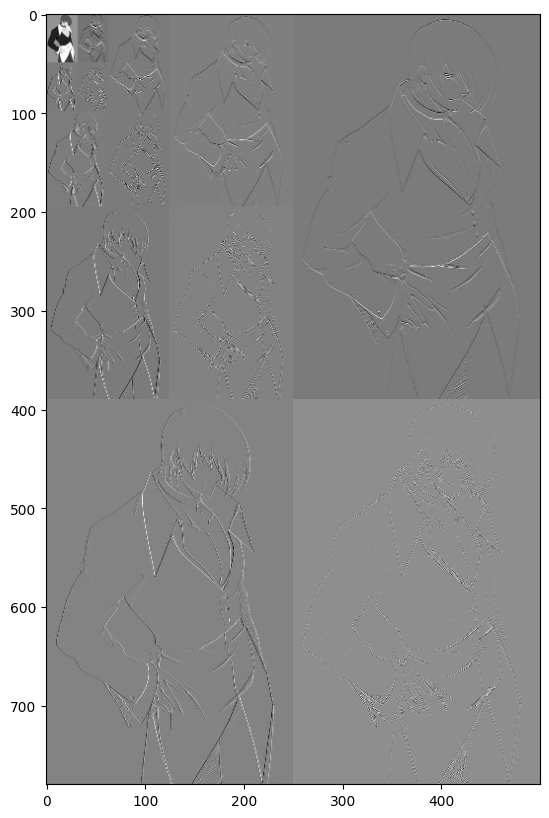

In [9]:
dkmp4 = DkmpDinamis(4, lowKernel, highKernel, yagamiGray)
plt.figure(figsize=(10,10))
plt.imshow(dkmp4, cmap="gray")

# 2. Melakukan rekonstruksi dari hasil dekomposisi

#### Membuat class dan metod unutk melakukan rekontruksi

In [10]:
class rekon:
    def __init__ (self, loK, hiK, HH, HL, LH,LL):
        self.loK = loK
        self.hiK = hiK
        self.HH =HH
        self.HL =HL
        self.LL =LL
        self.LH =LH
    
    def filter(self, image, kernel):
        img = image
        HtoInt = int((kernel.shape[0] - 1)/2)
        WtoInt = int((kernel.shape[1] - 1)/2)
        PaddingKanan = kernel.shape[1]-WtoInt
        PaddingBawah = kernel.shape[0]-HtoInt
        result = np.zeros(img.shape)
        img = np.pad(img, ((WtoInt, PaddingKanan), (HtoInt, PaddingBawah)),mode='edge')
        for i in range(result.shape[0]):
            for j in range(result.shape[1]):
                pixel = 0
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        pixel += img[i+k, j+l] * kernel[k, l]
                result[i, j] = pixel
        return result
    
    def upscaleRow(self, img):
        hasil = np.zeros([img.shape[0]*2,img.shape[1]])
        hasil[::2,::]=img
        return np.array(hasil, dtype='int')
    
    def upscaleCol(self, img):
        hasil = np.zeros([img.shape[0],img.shape[1]*2])
        hasil[::,::2]=img
        return np.array(hasil, dtype='int')
    
    def proses(self):
        upLL = self.upscaleCol(self.LL)
        upLH = self.upscaleCol(self.LH)
        upHL = self.upscaleCol(self.HL)
        upHH = self.upscaleCol(self.HH)
        filterUpLL = self.filter(upLL,np.transpose(self.loK))
        filterUpLH = self.filter(upLH,np.transpose(self.hiK))
        filterUpHL = self.filter(upHL,np.transpose(self.loK))
        filterUpHH = self.filter(upHH,np.transpose(self.hiK))
        MixLow = filterUpLL+filterUpLH
        MixHigh = filterUpHL+filterUpHH
        USMixLow = self.upscaleRow(MixLow)
        USMixHigh = self.upscaleRow(MixHigh)
        FUSMixLow = self.filter(USMixLow,self.loK)
        FUSMixHigh = self.filter(USMixHigh,self.hiK)
        Hasil = FUSMixHigh + FUSMixLow

        return Hasil



Kelas rekon bertujuan untuk melakukan proses rekonstruksi citra dari hasil transformasi DTCWT yang telah diperoleh sebelumnya.

Konstruktor (__init__): Metode ini digunakan untuk menginisialisasi objek kelas rekon. Pada saat pembuatan objek, kernel rendah (loK) dan kernel tinggi (hiK) yang digunakan dalam transformasi DTCWT serta citra hasil transformasi (HH, HL, LH, LL) diteruskan sebagai parameter.

Metode filter: Metode ini sama dengan metode filter pada kelas Dkmp. Fungsinya adalah untuk melakukan proses konvolusi terhadap citra dengan menggunakan kernel tertentu. Metode ini akan menghasilkan citra baru setelah proses konvolusi.

Metode upscaleRow dan upscaleCol: Metode ini digunakan untuk melakukan upscaling pada citra dalam arah baris dan kolom. Up-scaling dilakukan dengan cara menggandakan setiap baris atau kolom dalam citra.

Metode proses: Metode ini merupakan inti dari proses rekonstruksi citra. Pertama, citra LL dan LH di-upscale dalam arah kolom, dan citra HL dan HH juga di-upscale dalam arah kolom. Kemudian, dilakukan proses filtering pada citra hasil upscaling dengan menggunakan kernel rendah dan tinggi yang sudah di-transpose. Hasil filtering dari LL dan LH dijumlahkan sebagai MixLow, sedangkan hasil filtering dari HL dan HH dijumlahkan sebagai MixHigh. Setelah itu, kedua citra hasil ini di-upscale kembali dalam arah baris. Terakhir, dilakukan proses filtering lagi pada kedua citra hasil upscaling ini menggunakan kernel rendah dan tinggi. Hasil akhir dari penjumlahan filtering ini adalah citra hasil rekonstruksi.

Pengembalian Hasil: Citra hasil rekonstruksi dikembalikan sebagai output dari metode proses.

### menampilkian hasil rekontruksi


hasilRekon = rekon(lowKernel,highKernel, dkmp1.HHDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.LLDS).proses(): Membuat objek dari kelas rekon dengan menggunakan kernel rendah (lowKernel) dan kernel tinggi (highKernel), serta citra hasil transformasi DTCWT (dkmp1.HHDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.LLDS) sebagai parameter. Kemudian, metode proses() dipanggil untuk melakukan proses rekonstruksi citra. Hasil rekonstruksi disimpan dalam variabel hasilRekon.

plt.figure(figsize=(10,10)): Membuat sebuah gambar baru dengan ukuran 10x10 inci untuk menampilkan subplot.

plt.subplot(1,2,1): Membuat subplot pertama dari dua subplot dalam satu baris. Ini akan menampilkan citra asli.

plt.title('Image Asli'): Menambahkan judul untuk subplot yang menampilkan citra asli.

plt.imshow(yagamiGray, cmap="gray"): Menampilkan citra asli (yagamiGray) pada subplot pertama.

plt.subplot(1,2,2): Membuat subplot kedua dari dua subplot dalam satu baris. Ini akan menampilkan hasil rekonstruksi.

plt.title('Hasil Rekonstruksi'): Menambahkan judul untuk subplot yang menampilkan hasil rekonstruksi.

plt.imshow(hasilRekon, cmap="gray"): Menampilkan citra hasil rekonstruksi (hasilRekon) pada subplot kedua.

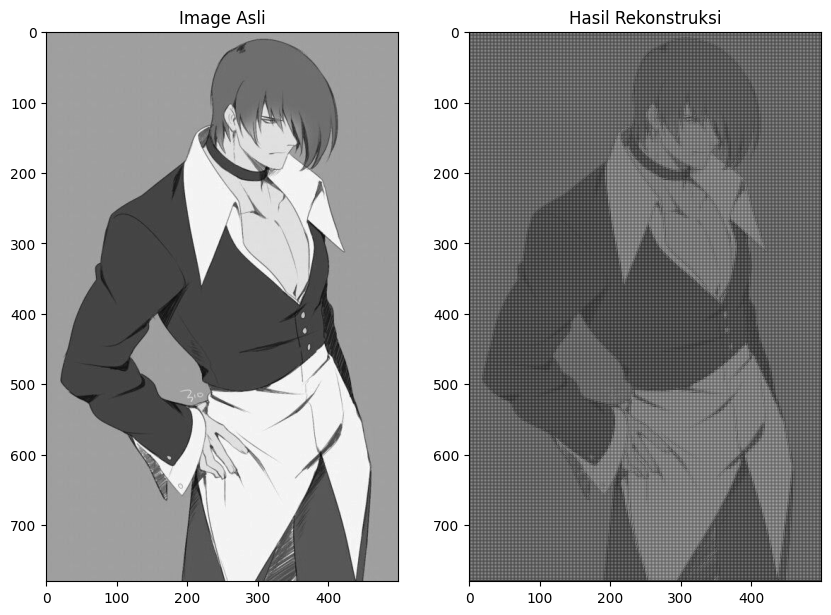

In [11]:
hasilRekon = rekon(lowKernel,highKernel, dkmp1.HHDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.LLDS).proses()
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Image Asli')
plt.imshow(yagamiGray, cmap="gray")
plt.subplot(1,2,2)
plt.title('Hasil Rekonstruksi')
plt.imshow(hasilRekon, cmap="gray")

# 3.Pada level berapa hasil dari dekomposisi berikut? berikan alasannya.


Dkmp pada soal no.3 ini merupakan hasil Dkmp pada leveel 6 karna menghasilkan ukuran dimensi yang sama sesuai dengan soal dimana pada soal dimensi yang ditampikan  12 x 7.

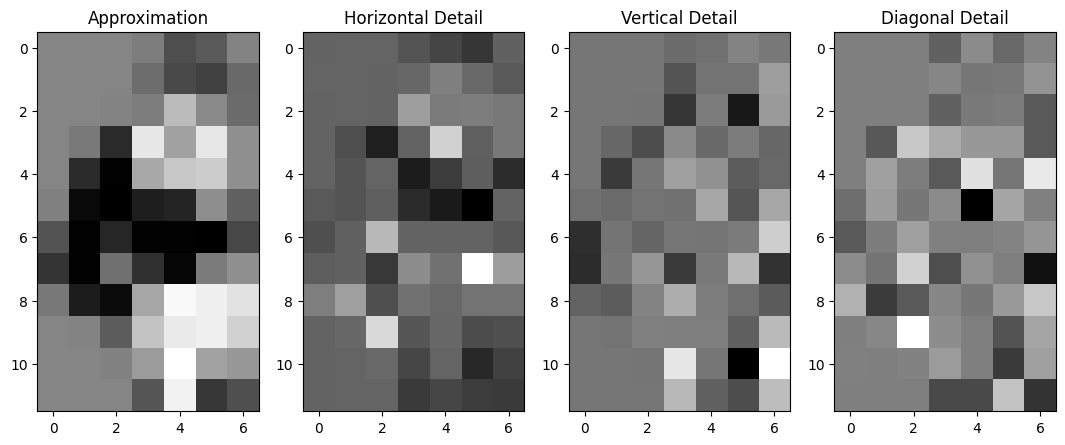

In [12]:
dkmp5 = Dkmp(dkmp4,lowKernel,highKernel)
dkmp5.Proses()

dkmp6 = Dkmp(dkmp5.LLDS,lowKernel,highKernel)
dkmp6.Proses()

dkmp7 = Dkmp(dkmp6.LLDS,lowKernel,highKernel)
dkmp7.Proses()

dkmp8 = Dkmp(dkmp7.LLDS,lowKernel,highKernel)
dkmp8.Proses()

plt.figure(figsize=(20,20))
plt.subplot(1,6,1)
plt.title('Approximation')
plt.imshow(dkmp6.LLDS[:12, :7], cmap="gray")
plt.subplot(1,6,2)
plt.title('Horizontal Detail')
plt.imshow(dkmp6.HLDS[:12, :7], cmap="gray")
plt.subplot(1,6,3)
plt.title('Vertical Detail')
plt.imshow(dkmp6.LHDS[:12, :7], cmap="gray")
plt.subplot(1,6,4)
plt.title('Diagonal Detail')
plt.imshow(dkmp6.HHDS[:12, :7], cmap="gray")

# 4. Menampilkan representasi sinyal pada hasil dekomposisi pada nomor 3

In [13]:
def lineSignal(image):
    line = np.zeros((image.shape[0]*image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            line[i*image.shape[1]+j] = image[i][j]

    return line

Fungsi lineSignal ertujuan untuk mengonversi citra menjadi sinyal garis tunggal dengan menyusun piksel-pikselnya secara berurutan.

Parameter Fungsi: Fungsi lineSignal menerima satu parameter yaitu 
-image: Citra yang akan dikonversi menjadi sinyal garis tunggal.

Inisialisasi Variabel: Sebuah array line yang terdiri dari nol dengan ukuran (image.shape[0]*image.shape[1]) dibuat. Ini adalah tempat di mana sinyal garis tunggal akan disimpan.

Looping: Dilakukan looping sepanjang dimensi citra.
Pada setiap iterasi, piksel citra (image[i][j]) diambil dan dimasukkan ke dalam array line pada posisi yang sesuai. Posisi ini dihitung dengan mengalikan indeks baris (i) dengan lebar citra (image.shape[1]) dan menambahkan indeks kolom (j).

fungsi lineSignal untuk mengonversi citra hasil transformasi DTCWT menjadi sinyal garis tunggal pada setiap subband (HH, HL, LH, LL), dan kemudian menampilkan sinyal-sinyal tersebut dalam plot garis.

Konversi Citra ke Sinyal Garis:
Citra hasil transformasi DTCWT (dkmp6.LLDS, dkmp6.HLDS, dkmp6.LHDS, dkmp6.HHDS) dipotong menjadi ukuran 12x7 piksel menggunakan slicing untuk menghasilkan subregion yang lebih kecil, kemudian masing-masing potongan citra dikonversi menjadi sinyal garis tunggal menggunakan fungsi lineSignal. Ini dilakukan untuk menghasilkan sinyal yang lebih mudah divisualisasikan.

Plotting Sinyal Garis:
Setiap sinyal garis tunggal (HHsignal, HLsignal, LHsignal, LLsignal) kemudian diplot menggunakan plt.plot().
Setiap plot diberi judul yang sesuai berdasarkan jenis subbandnya (Approximation, Horizontal, Vertical, dan Diagonal).
Label sumbu x diberi nama "Posisi Piksel" untuk menunjukkan posisi piksel dalam sinyal.
Label sumbu y diberi nama "Intensitas" untuk menunjukkan intensitas piksel dalam sinyal.

Tampilan Plot:
Plot untuk setiap subband ditampilkan secara terpisah dengan menggunakan plt.show().
Setiap plot memiliki ukuran gambar 12x5 inci untuk memastikan visualisasi yang jelas.

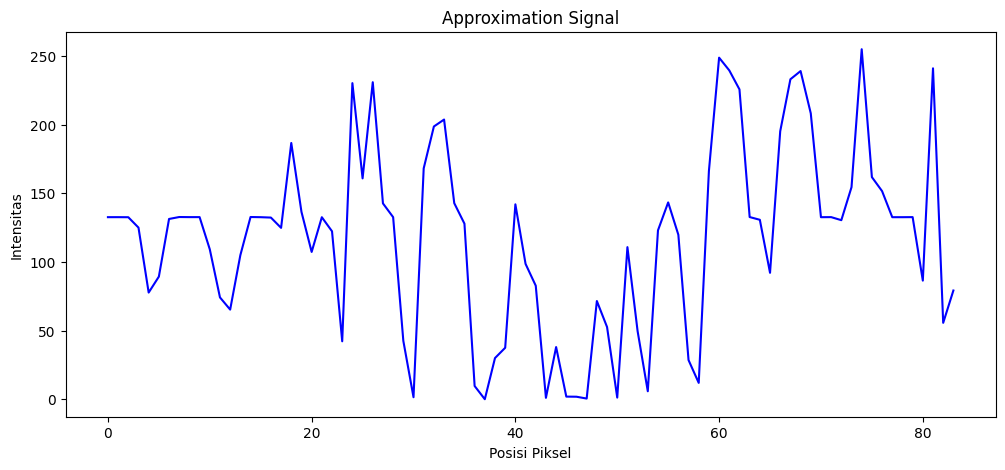

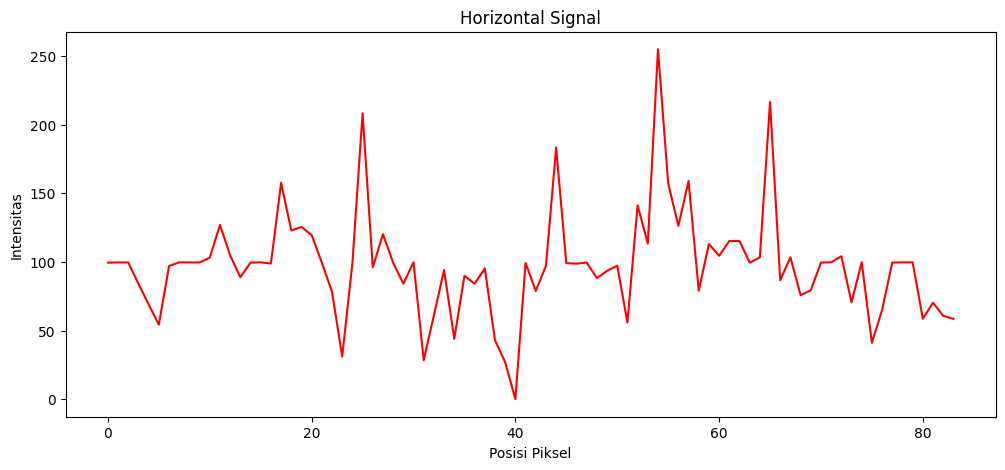

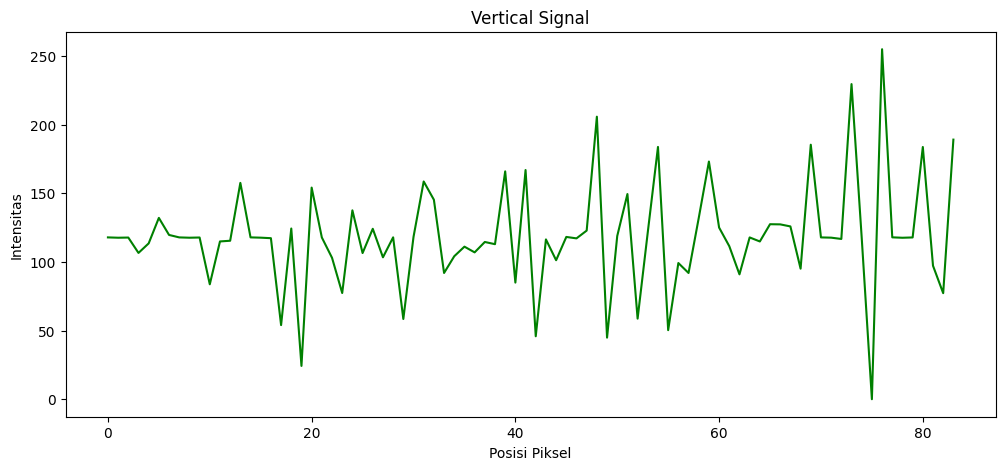

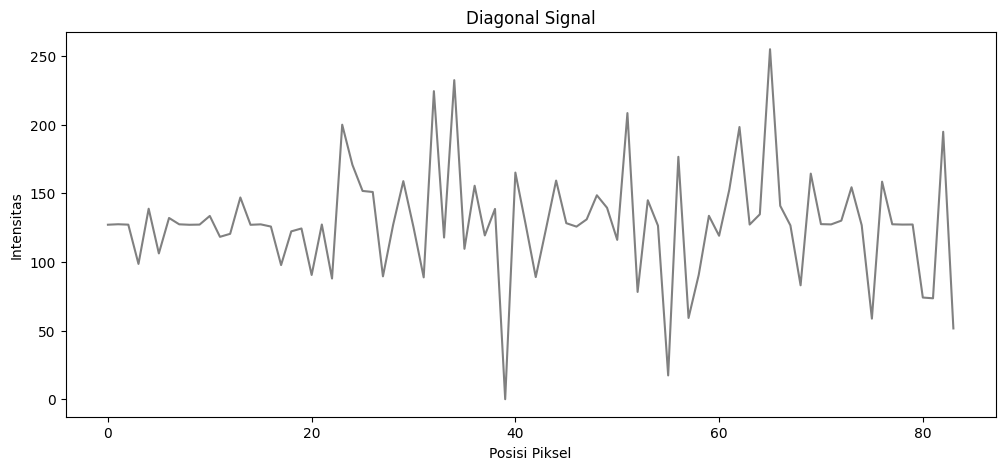

In [14]:
HHsignal = lineSignal(dkmp6.LLDS[:12, :7])
HLsignal = lineSignal(dkmp6.HLDS[:12, :7])
LHsignal = lineSignal(dkmp6.LHDS[:12, :7])
LLsignal = lineSignal(dkmp6.HHDS[:12, :7])

# Plot sinyal garis
plt.figure(figsize=(12,5))
plt.plot(HHsignal, color='blue')
plt.title('Approximation Signal')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HLsignal, color='red')
plt.title('Horizontal Signal')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LHsignal, color='green')
plt.title('Vertical Signal')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LLsignal, color='gray')
plt.title('Diagonal Signal')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')
plt.show()